In the JNB we visualize Chicago demolition data from the Chicago Data Portal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_demo=pd.read_csv('Building_Permits.csv')
raw_demo.columns

C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,16,18,44,45,46,47,48,103,104,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['ID', 'PERMIT#', 'PERMIT_TYPE', 'REVIEW_TYPE', 'APPLICATION_START_DATE',
       'ISSUE_DATE', 'PROCESSING_TIME', 'STREET_NUMBER', 'STREET DIRECTION',
       'STREET_NAME',
       ...
       'PIN9', 'PIN10', 'COMMUNITY_AREA', 'CENSUS_TRACT', 'WARD',
       'XCOORDINATE', 'YCOORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object', length=119)

In [3]:
demo=raw_demo[["ISSUE_DATE","WORK_DESCRIPTION","TOTAL_FEE","LATITUDE","LONGITUDE"]]
demo.head()

,ISSUE_DATE,WORK_DESCRIPTION,TOTAL_FEE,LATITUDE,LONGITUDE
0,11/3/2021,ADMINISTRATIVE ORDER TO WRECK AND REMOVE A 1 S...,2000,41.730566,-87.551122
1,3/23/2021,WRECK AND REMOVE A 2 STORY FRAME RESIDENCE AND...,500,41.974943,-87.676226
2,11/3/2021,WRECK AND REMOVE A 1 STORY MASONRY RESIDENCE A...,500,42.007932,-87.808459
3,11/3/2021,EMERGENCY WRECK AND REMOVE A 3 STORY MASONRY M...,500,41.776807,-87.649715
4,10/6/2020,EMERGENCY WRECK AND REMOVE A 1 STORY FRAME RES...,500,NaN,NaN


In [4]:
df=demo
df.dropna
df["TOTAL_FEE"].max()

43092

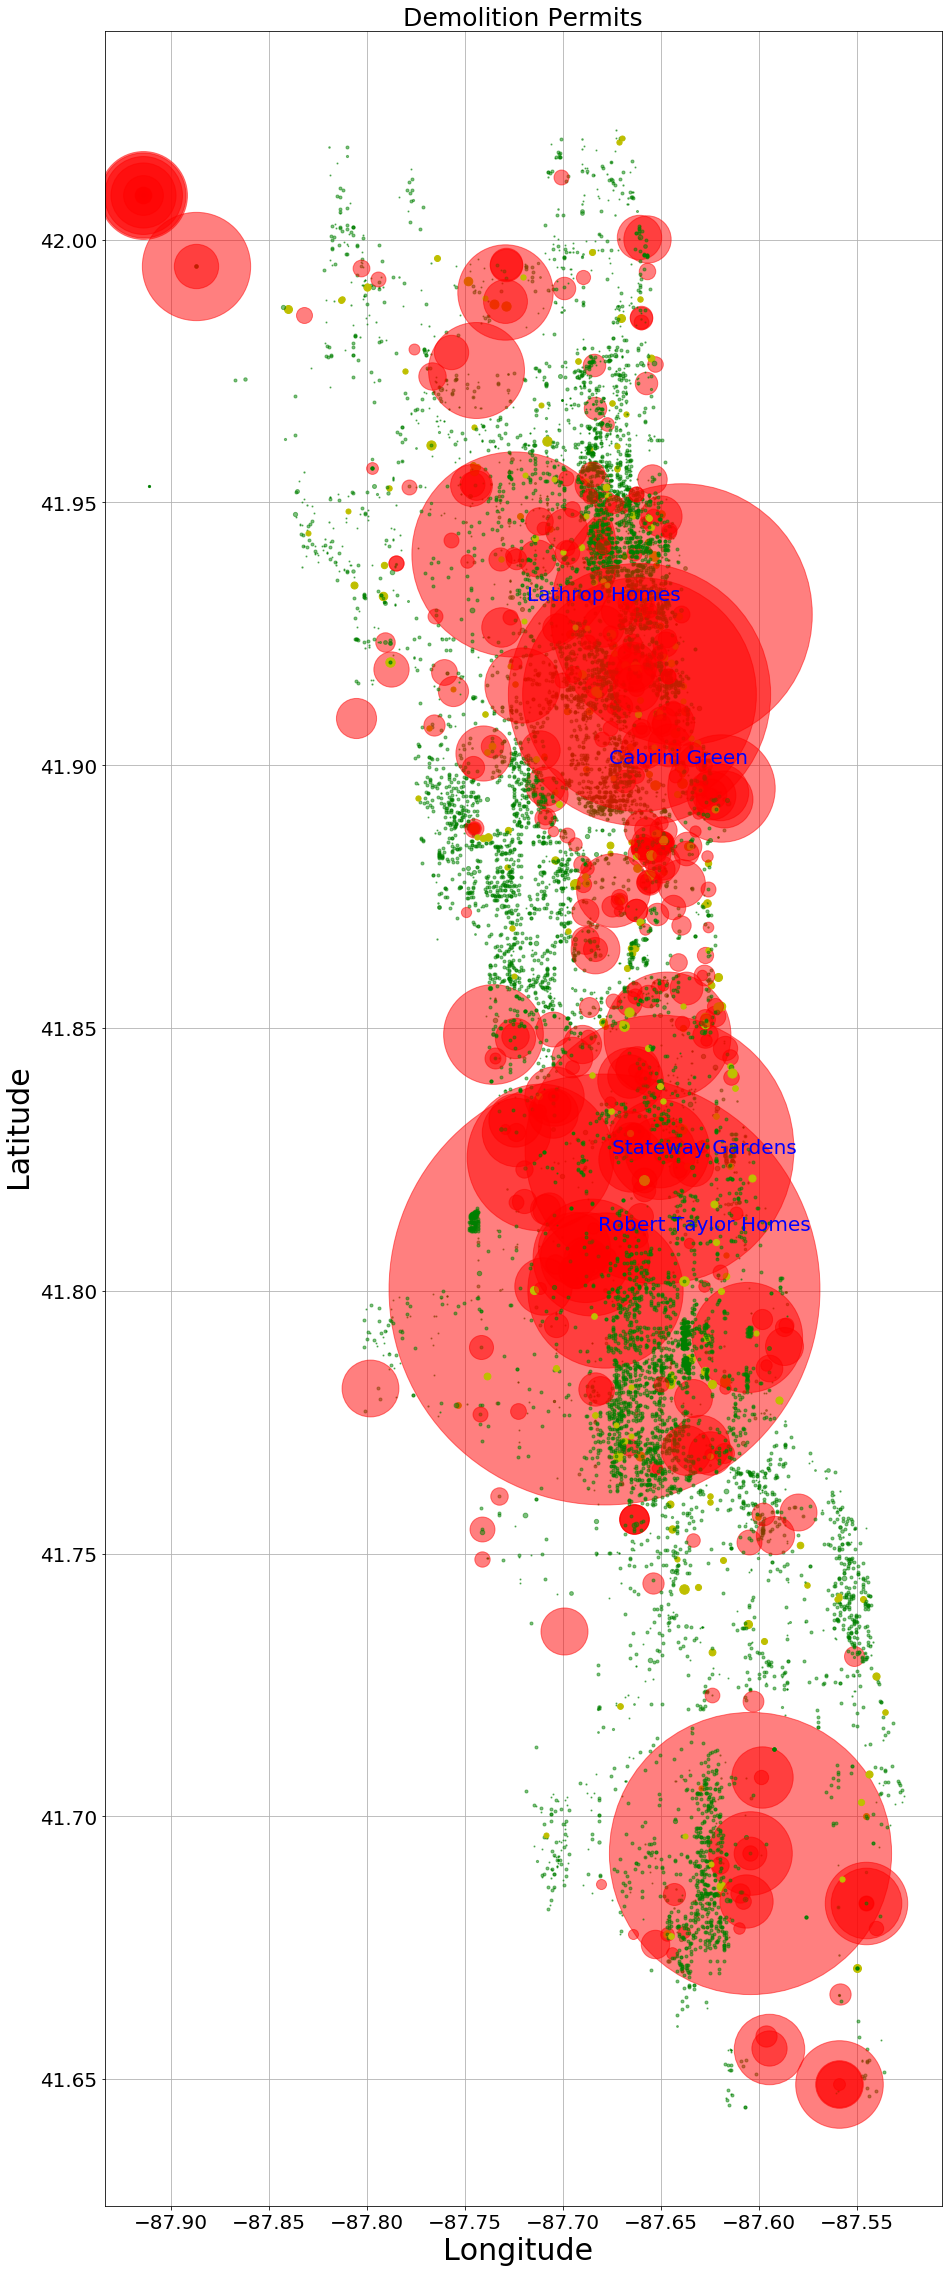

In [5]:
plt.figure(figsize=(15,40))

for i in df.index:
    tf=float(df.loc[i,"TOTAL_FEE"])
    if tf<500: #plot in green
        plt.plot(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'], 'o', markerfacecolor='g', markeredgecolor='g', markersize=.01*tf,alpha=.5)
        #plt.text(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'],str(tf),color='k',size=12, ha='center',va='center')
    if tf>500 and tf <1000:  #plot in yellow
        plt.plot(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'], 'o', markerfacecolor='y', markeredgecolor='y',  markersize=.01*tf,alpha=1)
        #plt.text(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'],str(tf),color='k',size=12, ha='center',va='center')
    if tf >1000:  #plot in red
        plt.plot(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'], 'o', markerfacecolor='r', markeredgecolor='r',  markersize=.01*tf,alpha=.5)
        #plt.text(df.loc[i,'LONGITUDE'], df.loc[i,'LATITUDE'],str(tf),color='k',size=12, ha='center',va='center')
plt.gca().grid()
plt.yticks(fontsize=20) 
plt.xticks(fontsize=20)
#Add Geographic References

plt.text(-87.6275,41.8125,'Robert Taylor Homes',color='b',size='20',ha='center',va='center')
plt.text( -87.641111,41.901389,'Cabrini Green',color='b',size='20',ha='center',va='center')
plt.text( -87.627778,41.827222,'Stateway Gardens',color='b',size='20',ha='center',va='center')
plt.text( -87.679039,41.932529,'Lathrop Homes',color='b',size='20',ha='center',va='center')
#title
plt.title('Demolition Permits',size=25)  #add the title
plt.xlabel("Longitude ",size=30)  #add the x-axis label
plt.ylabel("Latitude  ",size=30)  #dd the y-axis label
plt.savefig("demolition.png") #save the figure to a file

Separate the month, day, and year from the ISSUE_DATE

In [ ]:
for i in df.index:
    df.loc[i,'month'], df.loc[i,'day'], df.loc[i,'year'] = df.loc[i,"ISSUE_DATE"].split('/')
df.head(1)

C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\pisihara\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
df["year"].value_counts()

In [ ]:
df06=df[df["year"]=='2006']
df06.head()